### 필요한 패키지들

In [2]:
%config IPCompleter.greedy=True

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline

### 데이터 불러들이기 및 확인

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 이상치 들에 대해서 확인!!!

* outlier에 대한 것들에 대한 확인 : 아래 경우에 대해서 확인을 하면, 오른쪽 아래 쪽에 이상하게 튀는 애들이 존재!!!

<Figure size 432x288 with 0 Axes>

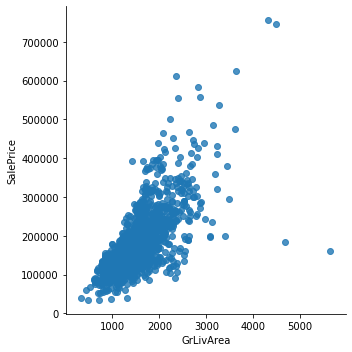

In [7]:
plt.figure()
otl = sns.lmplot('GrLivArea', 'SalePrice',data=train_df, fit_reg=False)

* 위에 대한 데이터를 보고, outlier를 처리하기 위한 조건 선택

In [8]:
#train_df[(train_df['SalePrice'] < 300000) & (train_df['GrLivArea'] > 4000)]
train_df[(train_df['GrLivArea'] > 4000)][['SalePrice','GrLivArea']]
# train_df[(train_df['GrLivArea'] > 4000)].loc[:,["SalePrice","GrLivArea"]]

,SalePrice,GrLivArea
523,184750,4676
691,755000,4316
1182,745000,4476
1298,160000,5642


<Figure size 432x288 with 0 Axes>

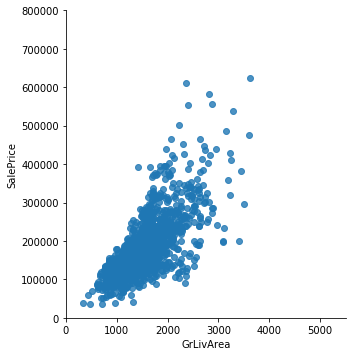

In [9]:
#train_df.drop(train_df[(train_df['SalePrice'] < 300000) & (train_df['GrLivArea'] > 4000)].index,inplace=True)
train_df.drop(train_df[(train_df['GrLivArea'] > 4000)].index,inplace=True)

plt.figure()
sns.lmplot('GrLivArea', 'SalePrice',data=train_df, fit_reg=False);
plt.xlim(0,5500);
plt.ylim(0,800000);

In [10]:
print(train_df.shape)

(1456, 81)


* Target Value에 대한 것을 확인!

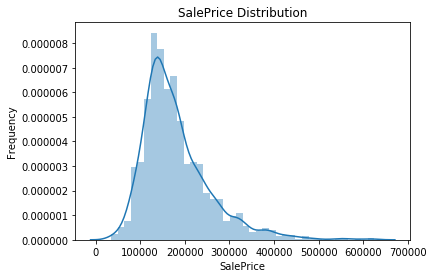

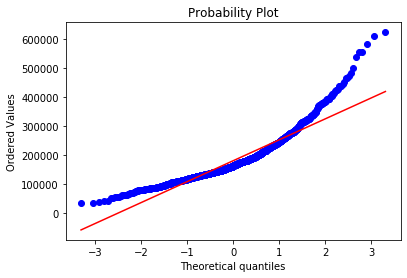

Skewness: 1.566


In [11]:
# 아직 seaborn 에서 stats로 넘기는 부분에서 워닝 부분이 안 되어서 아직은 여기서 워닝에 대한 부분은 타나남.
sns.distplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')
plt.figure()

# stats에 바로 접근하는 부분에 있어서는 array로 명확하게 변환을 해서 넘기면 워닝은 없어짐!!!!
qq = stats.probplot(np.array(train_df['SalePrice']), plot=plt)
plt.show()
print("Skewness: {:.3f}".format(train_df['SalePrice'].skew()))
# For normally distributed data, the skewness should be about zero. 
# A skenewss  value greater than zero means that there is more weight in the left tail of the distribution



* 타겟에 대한 로그 변환 취하기 : 양수에 대해서 처리 하고자 하니 +1을 하고 로그를 취해서 0의 값에 대해서 발생할 수 있는 문제에 대한 것 방지!

In [12]:
# log1p calculates log(1 + input)
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

* 로그를 취하면 그 결과가 치우친 부분들이 어떻게 되는지 확인

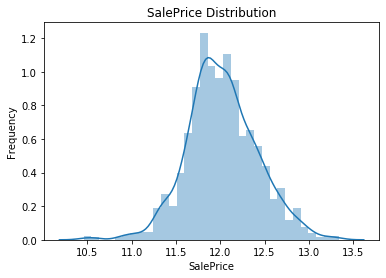

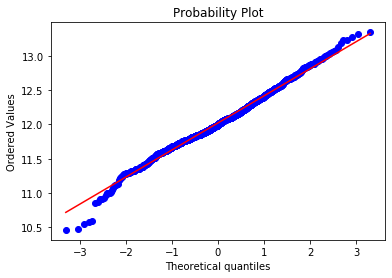

Skewness: 0.065


In [13]:
# let's check the result of the transformation

sns.distplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(np.array(train_df['SalePrice']), plot=plt)
plt.show()

print("Skewness: {:.3f}".format(train_df['SalePrice'].skew()))

* 보통은 전체 특성들에 대해서 다 상관계수나 pairplot을 그려보겠지만, 지금은 너무 데이터가 많이 있기에 하기가 힘들다. 그래서 상위 몇 개의 상관계수가 높은 것들에 대해서만 보고자 함!!!!      
해석 : 그래서 보면 집가격에 영향을 미치는 상위 10개에 대해서 확인을 한 결과 퀄리티에 관련된 (OverallQual,FullBath, YearBuilt, YearRemodAdd)와 크기에 대한 (GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF) 부분들이 중요한 부분으로 차지하고 있음!!!

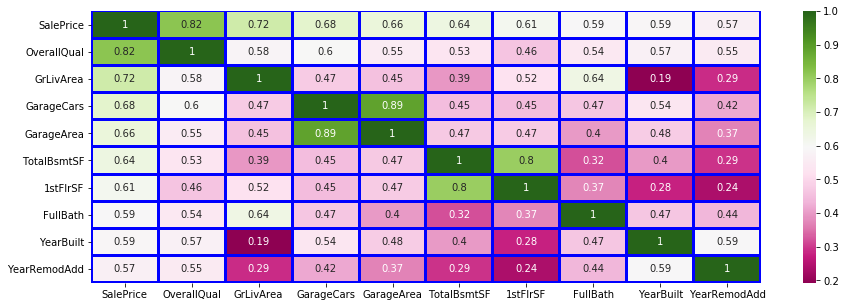

In [14]:
plt.figure(figsize=(15,5))

# correlation table
corr_train = train_df.corr()

# select top 10 highly correlated variables with SalePrice
num = 10
col = corr_train.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(train_df[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='PiYG', linecolor='blue')

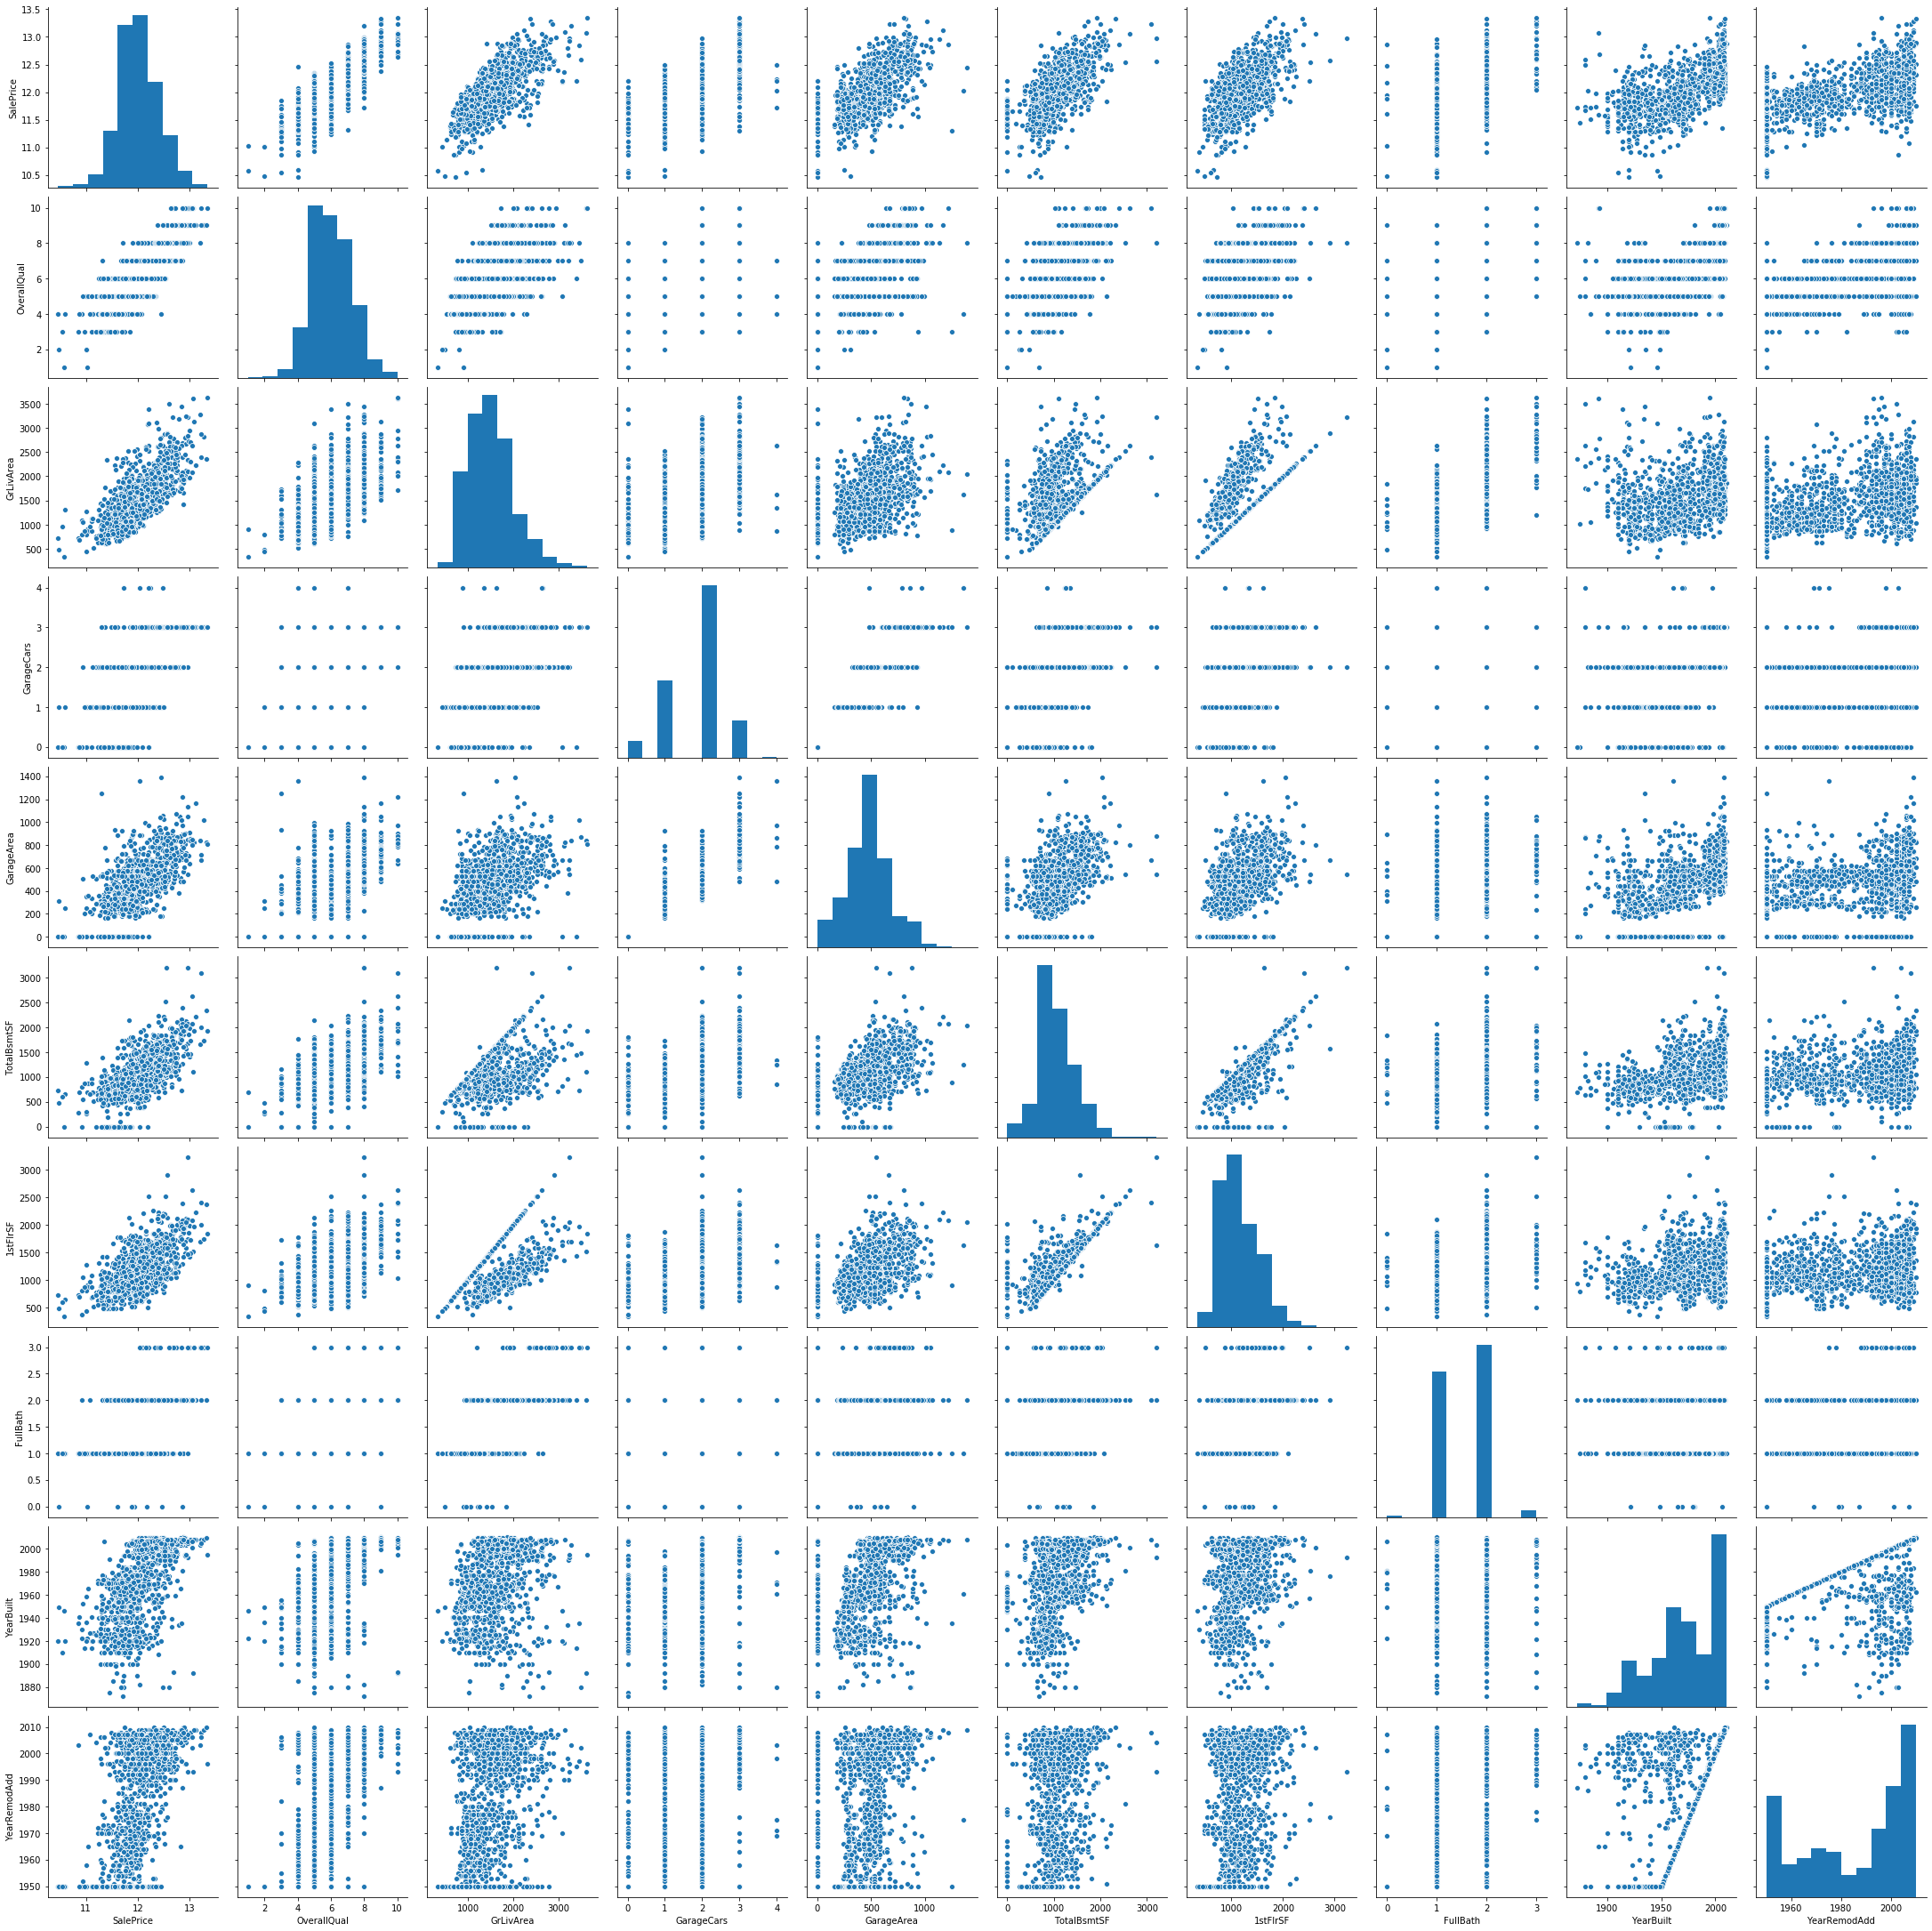

In [27]:
sns.pairplot(train_df[col], height=3)

### 변수들 정리 : Feature / Target 분리

* 변수 분리 : 특징과 라벨에 대한 분리 작업 수행 ---> id라는 컬럼은 맨 앞에 있어서 0번으로 선택을 해서 지운 것이며, 학습할 특징에서는 제외를 하여야 하기에 drop을 이용해서 지우게 됨!!!  
처음에는 81개의 컬럼이 있었는데, 의미없는 id 컬럼 제거 & 타겟에 대한 가격에 대한 것 제거를 ㅎ서 총 81개에서 2개를 제외한 79개로 수정이 됨!!!!

In [15]:
# seperate id from datasets and drop them.

train_id = train_df.iloc[:,0]
test_id = test_df.iloc[:,0]

train_df.drop('Id',axis=1,inplace = True)
test_df.drop('Id',axis=1,inplace = True)

In [16]:
# seperate the target variable (SalePrice) from the train

y_df = train_df['SalePrice']
train_df.drop('SalePrice',axis=1,inplace=True)

print('dimension of the train:' , train_df.shape)
print('dimension of the test:' , test_df.shape)

dimension of the train: (1456, 79)
dimension of the test: (1459, 79)


* 우선은 나중에 사용하기 위해서, 문제들만 train/test 를 df라는 변수에 합쳐둔 것임!!~!

In [17]:
# In order to avoid repeating unnecessary codes, for our convenience, let's combine the train and test set.
df = pd.concat([train_df, test_df]).reset_index()

df.drop(['index'],axis=1,inplace=True)


In [18]:
print('dim of the dataset:' , df.shape)
df.head()

dim of the dataset: (2915, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Feature Engineering

#### Missing Data 처리를 위한 확인!

In [19]:
mc = pd.DataFrame(df.isnull().sum(),columns=['Missing Count'])
mc = mc[mc['Missing Count']!=0]
mc['Missing %'] = (mc['Missing Count'] / df.shape[0]) * 100
mc.sort_values('Missing %',ascending=False)

,Missing Count,Missing %
PoolQC,2907,99.725557
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageFinish,159,5.454545
GarageQual,159,5.454545
GarageCond,159,5.454545
GarageYrBlt,159,5.454545


#### 빈 값들에 대해서 채우는 것 : None으로 처리할 것과 0으로 처리할 것으로 구분을 함!!! 아니면 중간값이나 이런 부분으로 채우고 싶으면 Imputer등에 대한 것들을 활용하면 됨!!!

##### 여기서는 None으로 채우고 싶음!!

In [20]:
nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

for none in nones:
    df[none].fillna('None',inplace = True)

##### 여기서는 0으로 채우고 싶음

In [21]:
zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']

for zero in zeros:
    df[zero].fillna(0, inplace = True)

##### Utilities 컬럼은 너무 많이 하나의 데이터로 되어 있어서, 특징으로 사용이 불가능 할 것임!! 그래서 제거하기로 함!

In [22]:
Counter(df.Utilities)
#df["Utilities"].value_counts()

Counter({'AllPub': 2912, 'NoSeWa': 1, nan: 2})

In [23]:
df.drop('Utilities',axis=1, inplace=True)

##### 아래의 컬럼들은 위의 Utilites와는 달리 너무까지는 아니지만, 빠진 것들도 존재를 하고, 많은 항목들도 있고, 치우친 것들이 있어서, 제일 많이 나타나는 항목으로 채우고자 함!!!!

In [24]:
df.loc[:, "MSZoning"].value_counts()

RL         2261
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [25]:
df.loc[:, "Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     441
Wd Sdng     410
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [26]:
freq = ['MSZoning','Exterior1st',
        'Exterior2nd','SaleType','Electrical',
        'KitchenQual','Functional']

for fr in freq:
    df[fr].fillna(df[fr].mode()[0], inplace=True)

In [27]:
df.loc[:, "MSZoning"].mode()

0    RL
dtype: object

In [28]:
df.loc[:, "MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

#####  LotFrontage 에서는 너무 많은 값들이 이상하고, 이 값들으 좀 처리하기 위해서 비슷한 것들을 묶어서 사용을 하려고 함.    
그래서 우선은 기존의 값은 old_lotfrontage라는 컬럼으로 두고, LotArea, Neighborhood로 그룹화 해서 거기서 나오는 값을 바탕으로 처리하고자 함!!!

In [29]:
df['old_lotfrontage'] = df['LotFrontage']

#df['LotFrontage'] = df.groupby(['LotArea','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

* 왼쪽이 처리하기 전의 기존의 값의 분포이고, 오른쪽이 위와 같은 처리를 하였을 때의 분포를 나타낸 것임!!

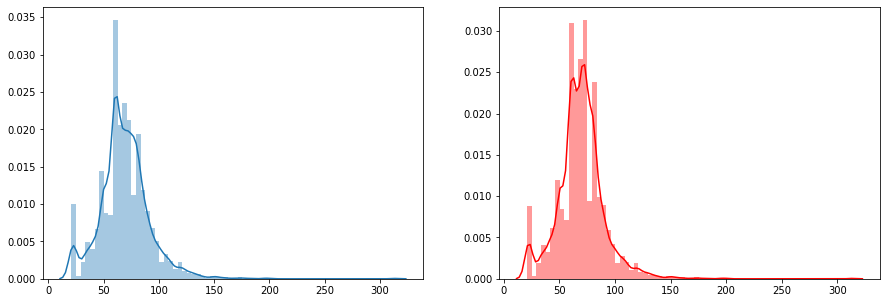

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.distplot(np.array(df['old_lotfrontage'].dropna()),ax=ax1,kde=True,bins=70)
lf = sns.distplot(np.array(df['LotFrontage']),ax=ax2,kde=True,bins=70,color='red')

# drop the old_lotfrontage as we finished the comparison
df.drop('old_lotfrontage',axis=1,inplace=True)

* 위와 같이 처리를 해서 이상한 값에 대한 것들을 처리를 완료함

In [31]:
print("Remaining missing values:",df.isnull().sum().sum())

Remaining missing values: 0


###  변형 및 인코딩

#### 범주형 데이터 변형

In [32]:
# 뒤에서 그냥  get_dummy로 처리할 것임...
df['MoSold'] = df.astype(str)
df['YrSold'] = df.astype(str)
df['MSSubClass'] = df.astype(str)

nominals = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition','MoSold','YrSold']


#### 여기서는 순서가 중요한 변수들

In [33]:
from sklearn.preprocessing import LabelEncoder

ordinals = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

for ordinal in ordinals:
    le = LabelEncoder()
    le.fit(df[ordinal])
    df[ordinal] = le.transform(df[ordinal])

#### House Price에 상관계수가 높은 거의 비슷한 컬럼들을 종합하여서 1개의 컬럼으로  변형

In [34]:
# Total square feet of houses

df['totalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

#### 수치 데이터의 분포를 보고, 얼마나 치우쳐서 있는지 확인 : +1보다 크고, -1보다 작으면 상당히 skew되어 있으며, -1~-0.5/ 0.5~1 사이에는 적당히 skew, -0.5~ 0.5 사이는 적당히 잘 분포

In [35]:
# Assign numeric features by excluding non numeric features
numeric = df.dtypes[df.dtypes != 'object'].index

# Display the skewness of each column and sort the values in descending order 
skewness = df[numeric].apply(lambda x: x.skew()).sort_values(ascending=False)

# Create a dataframe and show 5 most skewed features 
sk_df = pd.DataFrame(skewness,columns=['skewness'])
sk_df['skw'] = abs(sk_df)
sk_df.sort_values('skw',ascending=False).drop('skw',axis=1).head()

,skewness
PoolQC,-22.996032
MiscVal,21.943440
PoolArea,18.711459
LotArea,13.130516
LowQualFinSF,12.086535


#### 위의 결과들이 엄청나게 skew되어 있어서 이에 대한 변형 수행 : log1p사용 : log(x+1)

In [36]:
# As a general rule of thumb, skewness with an absolute value less than 0.5 is considered as a acceptable range of skewness for normal distribution of data
skw_feature = skewness[abs(skewness) > 0.5].index

# Transform skewed features to normal distribution by taking log(1 + input)
df[skw_feature] = np.log1p(df[skw_feature])


#### 기타 아직 변형이 안 되어 있는 아주 중요하지 않은 변수들(카테고리)을 처리

In [37]:
df = pd.get_dummies(df)
print(df.shape)

(2915, 265)


### Train / Test  분리

In [38]:
# Split the combined dataset into two: train and test

X_train = df.iloc[:train_df.shape[0],:]
X_test = df.iloc[train_df.shape[0]:,:]

#X_train, X_test, y_train, y_test = train_test_split(df,y_df, random_state = 1)

In [39]:
# 참고로 원래의 데이터가 train / test 가 1456개, 1459개로 거의 동일한 크기의 데이터가 주어진 것!!!
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(1456, 265), test shape:(1459, 265)


### 모델링

* xgboost를 윈도우에서 사용하시는 분들은 경로 설정 추가 필요     
* mlxtend 패키지 설치

In [40]:
# Import libraries

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge


# 아래 추가적인 패키지가 설치가 되어 있어야 함!!!!!!!
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor


# 시간
import time

#### 정규화 작업

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
#X_train = RobustScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = df.columns )

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df.columns)
#X_test = RobustScaler().fit_transform(X_test)

In [42]:
y_df.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [43]:
y_df.shape

(1456,)

In [44]:
#  참고) 위에서 제일 원본 데이터는 208500이였는데, 이것을 log1p로 변환한 것을 정답지로 놓고 하는 것이니
# 하기 전에 맞게 변환이 되었는지 확인!!!!!!
np.log1p(208500)

12.24769911637256

#### 모델의 종류들 : 평가는 root-mean-squared-error 로 평가

        Ridge Regression
        Lasso Regression
        ElasticNet Regression
        Support Vector Machine
        Random Forest
        XG Boost

##### 평가 및 kfold 사용 준비

In [45]:
kfold = KFold(n_splits=6, random_state= 0, shuffle = True)

In [46]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_df, 
                                   scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

##### 참고) 평가지표

<img src="img/01.png">
<img src="img/02.png">
<img src="img/03.png">
<img src="img/04.png">
<img src="img/05.png">
<img src="img/06.png">

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

* RMSLE 의 특징 : 하지만 kaggle 에서의 평가 지표는 RMSE 임!<br>
<img src="img/07.png">
<img src="img/08.png">
<img src="img/09.png">

* Scikit Learn 에서의 평가 지표

<img src="img/10.png">

##### Rigid 

* ref ) https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge

In [47]:
import time

In [48]:
KR = KernelRidge()

KR_param_grid = {
    # Ridge 만의 패널티 조절 옵션.. svm에서의 C와 유사한 개념..
    'alpha' : [0.01,0.1,0.5,1,1.5,2],
    
    # 데이터 자체를 변환을 해서 분석을 위한 변형부분...
    # kernel --> rbf, poly etc.......
    'kernel' : ['polynomial',"rbf"],
    'gamma':np.logspace(-15, 4, num = 5, base = 2.0),
    'degree': [2,3],
    'coef0':[0.5,1.0,1.5,2.0]
    
}

In [49]:
n_iter_search=20
KR_RS=RandomizedSearchCV(KR,
                         param_distributions=KR_param_grid,
                         n_iter=n_iter_search,
                         cv=kfold,
                         scoring="neg_mean_squared_error",
                         n_jobs=-1
)
KR_RS.fit(X_train,y_df)
KR_RS_best=KR_RS.best_estimator_
print(KR_RS_best)
print("Best Setting Params:",KR_RS_best.get_params)

KernelRidge(alpha=2, coef0=2.0, degree=3, gamma=0.0008211879055212056,
            kernel='polynomial', kernel_params=None)
Best Setting Params: <bound method BaseEstimator.get_params of KernelRidge(alpha=2, coef0=2.0, degree=3, gamma=0.0008211879055212056,
            kernel='polynomial', kernel_params=None)>


In [51]:
score=rmse_cv(KR_RS_best)
print("Kernel Ridge mean score:",score.mean())
print("Kernel Ridge std score:",score.std())

Kernel Ridge mean score: 0.1126242636022836
Kernel Ridge std score: 0.00788981108806194


In [58]:
KR_param_grid = {
    'alpha' : [1,1.1,0.9,2,2.5,1.5],
    'kernel' : ["polynomial"],
    'gamma':np.logspace(-15, 4, num = 5, base = 2.0),
    'degree': [3,4,5],
    'coef0':[1.5,2.0,2.5]
    
}

In [59]:
KR_CV = GridSearchCV(KR, 
                     param_grid = KR_param_grid, 
                     cv = kfold, 
                     scoring = "neg_mean_squared_error",
                     n_jobs = -1, 
                     verbose = 1)
KR_CV.fit(X_train, y_df)
KR_best = KR_CV.best_estimator_
print(KR_best)

Fitting 6 folds for each of 270 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   30.2s


KernelRidge(alpha=0.9, coef0=2.0, degree=3, gamma=0.0008211879055212056,
            kernel='polynomial', kernel_params=None)


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   40.3s finished


In [73]:
score=rmse_cv(KR_best)
print("Kernel Ridge mean score:",score.mean())
print("Kernel Ridge std score:",score.std())

Kernel Ridge mean score: 0.11195798047501966
Kernel Ridge std score: 0.007964358800003079


In [61]:
y_submission_1 = np.expm1(KR_best.predict(X_test))

##### Lasso Regression

* ref) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [62]:
Las = Lasso(random_state=1234,max_iter=10000)

In [64]:
Las_param_grid={
    'alpha' : [0.0001,0.0005,0.0008,0.001,0.005,0.009,0.01,0.02,0.03,0.1,0.2,0.3,1,1.1,1.2,2,3],
}

In [67]:
n_iter_search=20
LASSO_RS=RandomizedSearchCV(Las,
                         param_distributions=Las_param_grid,
                         n_iter=n_iter_search,
                         cv=kfold,
                         scoring="neg_mean_squared_error",
                         n_jobs=-1,
                         random_state=1234
)
LASSO_RS.fit(X_train,y_df)
LASSO_RS_best=LASSO_RS.best_estimator_
print(LASSO_RS_best)
print("Best Setting Params:",LASSO_RS_best.get_params)

C:\Users\acorn-501\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 17 is smaller than n_iter=20. Running 17 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.0001, warm_start=False)
Best Setting Params: <bound method BaseEstimator.get_params of Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.0001, warm_start=False)>


In [69]:
score=rmse_cv(LASSO_RS_best)
print("LASSO mean score:",score.mean())
print("LASSO std score:",score.std())

LASSO mean score: 0.11250935655377244
LASSO std score: 0.009033301329805156


In [70]:
LASSO_param_grid = {
    'alpha' : [0.001,0.002,0.003,0.0009,0.0008,0.0007,0.0011,0.0012,0.0013,0.0014,0.0015,0.00099,0.00098,0.00097],
    
}

In [71]:
LASSO_CV = GridSearchCV(Las, 
                     param_grid = LASSO_param_grid, 
                     cv = kfold, 
                     scoring = "neg_mean_squared_error",
                     n_jobs = -1, 
                     verbose = 1)
LASSO_CV.fit(X_train, y_df)
LASSO_best = LASSO_CV.best_estimator_
print(LASSO_best)

Fitting 6 folds for each of 14 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    1.2s finished


In [72]:
score=rmse_cv(LASSO_best)
print("LASSO mean score:",score.mean())
print("LASSO std score:",score.std())

LASSO mean score: 0.11186184946614013
LASSO std score: 0.009293835314203474


##### ElasticNet Regression

##### Support Vector Machine

* SVR : Support Vector Machine Regression    
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

##### Random Forest

* ref) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

##### XG Boost¶

* ref) https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters   

* 파라미터 : 일반 파라미터 / 부스트 파라미터 / 학습과정 파라미터/ 커맨드 라인 파리미터     
** 일반 파라미터   
1) booster : 어떤 부스팅 방식을 사용할 지 결정 - gbtree, gblinear, dart etc   
2) nthread : 몇 개의 thread를 사용해서 동시에 처리할지 - 기본은 최대한 많이 --> 특별히 선택하지 않아도 됨!   
3) num_feature  : 특징의 차원의 숫자를 정해야 하는 경우 옵션을 통해서 처리 - 기본은 최대한 많이 이기에, 특별하게 선택하지 않아도 될 듯   
** 부스팅 파라미터   
1) eta : 러닝 레이트임. 트리에 가지가 많을 수록 overfitting이 발생하기에, 매번 부스팅 스탭마다 weight를 주어서 부스팅 과정에서 과접합이 일어나지 않도록 함.   
2) gamma : 정보 획득에서 -r로 펴현이 되는 부분이 있는 감마임. 이 값이 커지게 되면 ㅡㅌ리의 깊이가 줄어들어서 좀 더 보수적인 모델이 된다. 기본값은 0임.  
3) max_depth : 한 트리의 최대 깊이를 지정하는 것. 숫자가 커지면 모델의 복잡도가 올라가고, 당연히 overfitting의 위험이 발생하게 된다. 기본은 6으로 되어 있어서 최대는 2^6=64개가 된다.  
4) lambda(L2 reg-form) : L2 정규화에 달리는 weight임. 숫자가 클 수록 보수적인 모델임.
5) alpha(L1 reg-form) : L1 정규화에 달리는 weight임. 숫자가 클 수록 보수적인 모델이 됨. 그리고 L2보다 아웃라이어에 좀 더 민감하게 작용을 하는 특징이 있음!!!   
** 학습 과정 파라미터   
1) objective : 목적 함수 (reg:linear, binary:logistic, count:possion  etc)   
2) eval_metric : 모델의 평가 함수를 조정하는 함수 . rmse( root mean square error). logloss(log-likelihood), map(mean average precision) etc   
** 커맨드 라인 파라미터   
1) num_rounds : boosting 라운드를 결정한다. 랜덤하게 하게 되니 적당히 크게 되어야 함. epoch와 동일.


### Ensemble - Stacked Regression and GridSearch

* ref) http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/

In [94]:
print("source: https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/")
Image(url= "https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor_files/stacking_cv_regressor_overview.png")

source: https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/


In [198]:
XGB = XGBRegressor(objective ='reg:squarederror',n_jobs =-1,random_state =1234)

ELNET = ElasticNet(random_state=1234, max_iter=10000)
LCV= Lasso(random_state=1234, max_iter=10000)
SV = SVR(max_iter=10000)
KR = KernelRidge()
XG = XGBRegressor(objective ='reg:squarederror',n_jobs =-1,random_state =1234)

stack = StackingRegressor(regressors = [ELNET,LCV,XG,SV,KR],
                          meta_regressor = XGB)

params = {       
        # mlxtend : 0.17 이하 버전기준..
    
#               'meta-xgbregressor__n_estimators' : [740*2],#740
#               'meta-xgbregressor__learning_rate': [0.01/2], #0.01
#                'meta-xgbregressor__min_child_weight':[0],
#               'meta-xgbregressor__gamma':[0.1],
#               'meta-xgbregressor__max_depth': [2],
#               'meta-xgbregressor__subsample':[0.65],
#               'meta-xgbregressor__colsample_bytree':[0.4],
#               'meta-xgbregressor__reg_alpha':[0],
#               'meta-xgbregressor__reg_lambda':[1],
    
        # mlxtend : 0.17 버전 기준 : http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/
                'meta_regressor__n_estimators' : [740*2],#740
              'meta_regressor__learning_rate': [0.01/2], #0.01
               'meta_regressor__min_child_weight':[0],
              'meta_regressor__gamma':[0.1],
              'meta_regressor__max_depth': [2],
              'meta_regressor__subsample':[0.65],
              'meta_regressor__colsample_bytree':[0.4],
              'meta_regressor__reg_alpha':[0],
              'meta_regressor__reg_lambda':[1],
              
              'lasso__alpha':[0.00244736842105],
              'elasticnet__alpha':[0.0276315789474],
              'elasticnet__l1_ratio':[0.09],
              'xgbregressor__min_child_weight':[0.2],
              'xgbregressor__n_estimators' : [870],
              'xgbregressor__learning_rate': [0.04],
              'xgbregressor__gamma':[0],
              'xgbregressor__max_depth': [3],
              'xgbregressor__subsample':[0.8],
              'xgbregressor__colsample_bytree':[0.7],
    
              'kernelridge__alpha':[0.93],
              'kernelridge__coef0':[1.5],
              'kernelridge__degree':[3],
              'kernelridge__gamma':[0.001],
              'kernelridge__kernel':['polynomial'],
              'kernelridge__kernel_params':[None],
              
              'svr__coef0':[1.6],
              'svr__kernel':['poly'],
              'svr__epsilon':[0.03],
              'svr__gamma': ['auto'],
              'svr__degree': [2],
              'svr__C':[0.1]
        }


stack_GS = GridSearchCV(estimator = stack,
                    param_grid=params
                    ,cv=kfold,
                    refit=True, 
                    verbose=1,
                    n_jobs=-1,
                    scoring="neg_mean_squared_error")
stack_GS.fit(X_train, y_df)
stack_GS_best = stack_GS.best_estimator_
print(stack_GS_best)

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    6.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.2s finished


StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.4, gamma=0.1,
                                              importance_type='gain',
                                              learning_rate=0.005,
                                              max_delta_step=0, max_depth=2,
                                              min_child_weight=0, missing=None,
                                              n_estimators=1480, n_jobs=-1,
                                              nthread=None,
                                              objective='reg:squarederror',
                                              random_state=1234, reg_alpha=...
                                           seed=None, silent=None,
                                           subsample=0.8

#### Ensemble - Averaging

### 제출

In [212]:
my_submission = pd.DataFrame()
my_submission['Id'] = test_id
my_submission['SalePrice'] = y_submission_avg
my_submission.to_csv('submission_trail_ver_0-1.csv',index=False)


<img src="img/11.png">

### To Do List

Mission : 위의 성능보다 더 나은 모델을 만들어 제출하시오!!!